# Первичный анализ данных

**Pandas** — это библиотека Python, предоставляющая широкие возможности для анализа данных. Данные часто хранятся в форме табличек — например, в форматах .csv, .tsv или .xlsx.

+ Основными структурами данных - классы Series и DataFrame. 

+ Первый из них представляет собой одномерный индексированный массив данных некоторого фиксированного типа.

+ Второй – это двухмерная структура данных, представляющая собой таблицу, каждый столбец которой содержит данные одного типа. 

+ Структура DataFrame отлично подходит для представления реальных данных: строки соответствуют признаковым описаниям отдельных объектов, а столбцы соответствуют признакам.

### **0. Импорт необходимых пакетов**

In [1]:
import pandas as pd
import numpy as np


### **1. Загрузка данных**

С помощью метода **read_csv** в Pandas загрузим необходимый файл.

**head(n)** - выводит первые n строк таблицы

In [2]:
data = pd.read_csv('kama_kosa.csv')

In [3]:
?pd.read_csv

In [4]:
data.to_csv('example.csv')

In [5]:
data.head()

,date;year;month;day;T;P;Q_obs;Q_sim
0,01.01.2008;2008;1;1;-6.5;0.6;10.6;0
1,02.01.2008;2008;1;2;-16.1;0;10.6;0
2,03.01.2008;2008;1;3;-13.8;0.9;10.6;0
3,04.01.2008;2008;1;4;-13.2;0.7;10.6;0
4,05.01.2008;2008;1;5;-11.7;0.4;10.2;0


Видим, что все плохо, потому что установили не те разделители (параметр sep).

In [7]:
df = pd.read_csv('kama_kosa.csv', sep=";")
df.date = pd.to_datetime(df.date, format="%d.%m.%Y")
df.head()

,date,year,month,day,T,P,Q_obs,Q_sim
0,2008-01-01,2008,1,1,-6.5,0.6,10.6,0.0
1,2008-01-02,2008,1,2,-16.1,0.0,10.6,0.0
2,2008-01-03,2008,1,3,-13.8,0.9,10.6,0.0
3,2008-01-04,2008,1,4,-13.2,0.7,10.6,0.0
4,2008-01-05,2008,1,5,-11.7,0.4,10.2,0.0


### **2. Посмотрим, что у нас за данные и какого типа**

Функция **shape** позволяет узнать размер данных

In [ ]:
a = df.shape

In [ ]:
type(a)

In [ ]:
a[0]

Функция **info** дает описание по всем признакам таблицы

In [ ]:
df.info()

Изменить тип колонки можно с помощью метода astype 

### **3. Извлечение основных статистических характеристик**

Функция **describe**:

число непропущенных значений, среднее, стандартное отклонение, диапазон, медиану, 0.25 и 0.75 квартили для признаков типа int и float

In [ ]:
df.describe()

In [ ]:
data = df[['T', 'P', 'Q_obs', 'Q_sim']].describe()

In [ ]:
data['T'][0]

Смотреть среднее за все время довольно таки странно (для месячных наблюдений норм). Что же делать?

### **4. Извлечение информации**

Для извлечения отдельного столбца и работы с ним используется достаточно простая конструкция **df['Название столбца']**

In [6]:
df['T'].mean()

NameError: name 'df' is not defined

Для чего это может быть полезно? Например, для того, чтобы отфильтровать таблицу (вытащить только необходимые нам строки (за определенный год или месяц))

**1 способ извлечения подтаблицы.**

Извлечем данные за 2015 год

In [ ]:
df[df['year'] == 2015].head()

Если условие более сложное, то конструкция будет выглядеть довольно громоздкой.

Например, извлечем данные за март 2014 года, когда температура была больше 0 

In [ ]:
(df['year'] == 2014) & (df['month'] == 3) & (df['T']> 0)

In [ ]:
df[(df['year'] > 2014) & (df['year'] < 2016) 
       & (df['month'] == 3) & (df['T']> 0)]

**2 способ**, как можно это сделать - функция **query**. Мне такая конструкция, если честно, нравится больше, но тут дело вкусов

In [ ]:
df.query('year >= 2014 & year<= 2016 & month == 3')

### **!!! Задание 1.** 
Чему равна среднемесячная температура в августе 2014 года?

In [ ]:
# Ваш код
df1 = df.query('year == 2014 & month == 8')

### 5. Группировка данных

Посчитать среднее за отдельный месяц это конечно хорошо, но хотелось бы за все месяцы и сразу =)

Можно это сделать с помощью цикла по номеру месяца. А можно воспользоваться уже готовыми функциями и пакетами

Для этого нам понадобится функция groupby, в качестве аргумента которой указывается признак или группа признаков, по которым будет происходить группировка (grouping_columns).

*Выведем максимальный расход воды за каждый год*

In [ ]:
df.groupby(by = ['year'])['Q_obs'].max()

Следующий код выведет средние значения по двум переменным за каждый год

In [ ]:
df.groupby(by = ['year'])['Q_obs','Q_sim'].mean()

Точно так же можно произвести вывод нескольких статистик для всех признаков 

In [ ]:
df_1 = df.groupby(by = ['year'])['Q_obs','Q_sim'].describe()

In [ ]:
df_1.to_csv('stat.csv')

Либо тоже самое можно было сделать с помощью функции **agg([набор применяемых функций])**

In [ ]:
df.groupby(by = ['year'])['Q_obs','Q_sim'].agg([np.mean, np.std, np.min, np.max])

In [8]:
df

,date,year,month,day,T,P,Q_obs,Q_sim
0,2008-01-01,2008,1,1,-6.50,0.60,10.6,0.00
1,2008-01-02,2008,1,2,-16.10,0.00,10.6,0.00
2,2008-01-03,2008,1,3,-13.80,0.90,10.6,0.00
3,2008-01-04,2008,1,4,-13.20,0.70,10.6,0.00
4,2008-01-05,2008,1,5,-11.70,0.40,10.2,0.00
...,...,...,...,...,...,...,...,...
2917,2015-12-27,2015,12,27,-13.13,1.65,26.7,1.11
2918,2015-12-28,2015,12,28,-12.40,2.13,26.7,1.07
2919,2015-12-29,2015,12,29,-14.29,0.60,26.5,1.03
2920,2015-12-30,2015,12,30,-19.85,0.28,26.5,0.99


### **!!! Задание 2.** 

Чему равны средние, максимальные и минимальные значения температур и осадков в каждом месяце за 2011 год?

In [11]:
df1 = df.query('year == 2011')
df1

,date,year,month,day,T,P,Q_obs,Q_sim
1096,2011-01-01,2011,1,1,-7.41,5.50,10.10,12.58
1097,2011-01-02,2011,1,2,-7.23,1.25,9.95,12.12
1098,2011-01-03,2011,1,3,-10.76,2.68,9.50,11.68
1099,2011-01-04,2011,1,4,-10.63,0.73,9.50,11.25
1100,2011-01-05,2011,1,5,-10.08,0.45,9.07,10.85
...,...,...,...,...,...,...,...,...
1456,2011-12-27,2011,12,27,-9.83,1.45,6.62,3.54
1457,2011-12-28,2011,12,28,-4.90,7.93,6.77,3.41
1458,2011-12-29,2011,12,29,-4.71,4.35,6.77,3.29
1459,2011-12-30,2011,12,30,-4.85,0.65,6.92,3.17


# Визуализация данных

### 0. Импортируем необходимые пакеты

In [17]:
# так как мы еще будем визуализировать, то нам нужны и такие пакеты)
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns


## 1. Простейшие графики

Построим графики реальных и смоделированных расходов воды.

В общем случае надо сначала **отфильтровать данные**, при необходимости **сгруппировать**, выбрать нужные столбцы, посчитать требуемые величины и построить график с помощью функции plot()

In [14]:
import matplotlib.pyplot as plt

<AxesSubplot:>

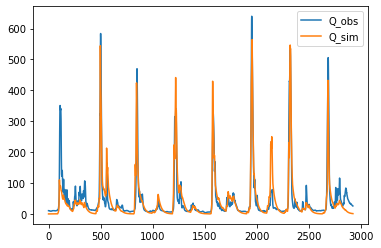

In [15]:
df[['Q_obs', 'Q_sim']].plot()

Чтобы сделать график чуть симпатичнее можно накрутить всяких условий

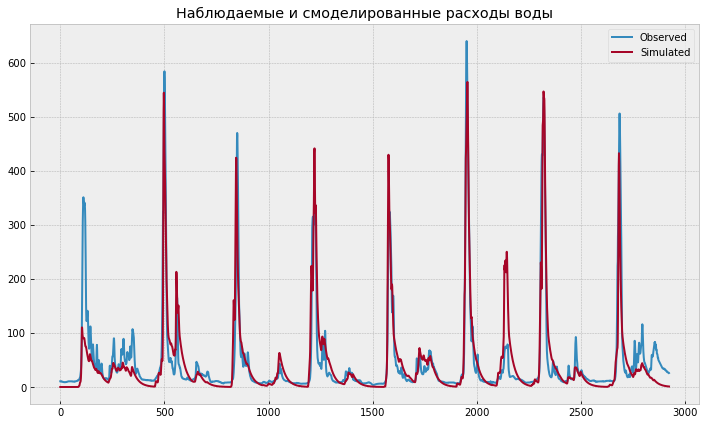

In [16]:
with plt.style.context('bmh'):
    fig = plt.figure(figsize=(12,7)) # отвечает за размер 
    plt.plot(df[['Q_obs', 'Q_sim']])
    plt.legend(('Observed', 'Simulated'))
    plt.title('Наблюдаемые и смоделированные расходы воды')


In [ ]:
# По умолчанию в качестве переменной х идет индекс таблицы. Но если задать в качестве х дату, то получается совсем красиво
with plt.style.context('bmh'):
    fig = plt.figure(figsize=(10,7)) # отвечает за размер 
    plt.plot(df.date, df[['Q_obs', 'Q_sim']])
    plt.legend(('Observed', 'Simulated'))
    plt.title('Наблюдаемые и смоделированные расходы воды')

С помощью функции GROUPBY можно найти найти интересующие нас характеристики и точно так же построить график

### !!! Задание 3.
а) Построить средний расход воды за каждый месяц за 2014 год

б) Построить максимальные расходы в апреле месяце за каждый год

In [25]:
df2 = df.groupby(by = ['year'])
df2

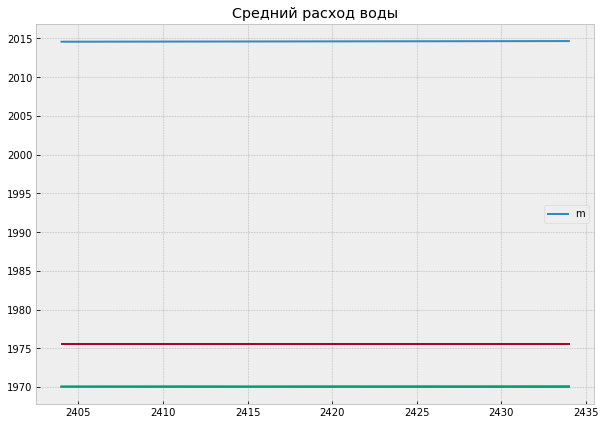

In [22]:
# a
with plt.style.context('bmh'):
    fig = plt.figure(figsize=(10,7))
    plt.plot(df1)
#     df_1 = df.groupby(by = ['year'])['Q_obs','Q_sim'].describe()
    plt.legend('m')
    plt.title('Средний расход воды')

In [ ]:
# b
# вставьте свой код

# 2. Распределение признака

**а.** С помощью seaborn можно построить распределение конкретных признаков с помощью функции distplot

C:\Users\gorba\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Q_sim', ylabel='Density'>

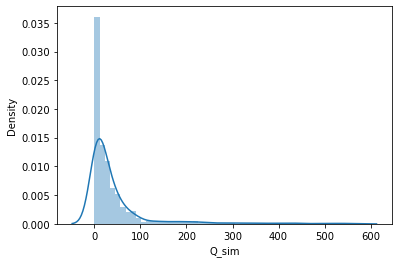

In [26]:
sns.distplot(df['Q_sim'])

### !!! Задание 4.
Постройте график распределения температур (1 балл). Как можно объяснить его форму? Обоснуйте свою гипотезу (1 балл).

In [ ]:
# Ваш код здесь

C:\Users\gorba\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='T', ylabel='Density'>

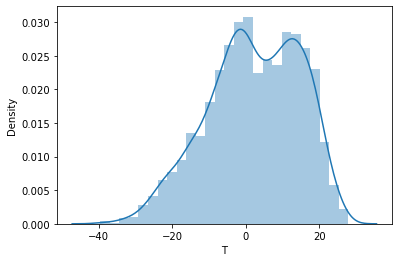

In [27]:
sns.distplot(df['T'])

**b.** Ящики с усами.
Если интересно посмотреть, как менялось рапределение в течении времени, то будет полезен box plot

<AxesSubplot:xlabel='month', ylabel='T'>

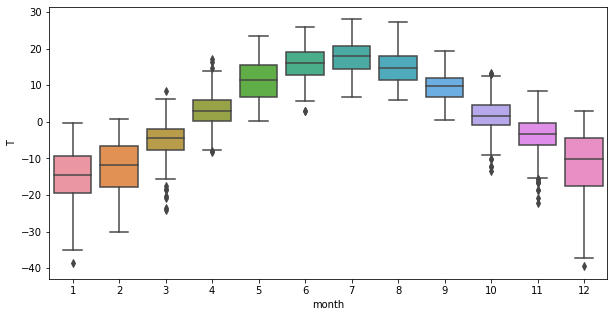

In [28]:
f, ax = plt.subplots(figsize=(10, 5))
sns.boxplot(x="month", y="T", data=df, ax = ax)

## 2. Совместное распределение параметров

Для того, чтобы посмотреть, как совместно ведут себя признаки полезно пользоваться функцией pair plot пакета seaborn.

Как можно видеть, на диагонали матрицы графиков расположены гистограммы распределений признака. Остальные же графики — это обычные scatter plots для соответствующих пар признаков.

При построении модели классификации бывает удобно добавить еще и сам таргет, но об этом на следующем семинаре.


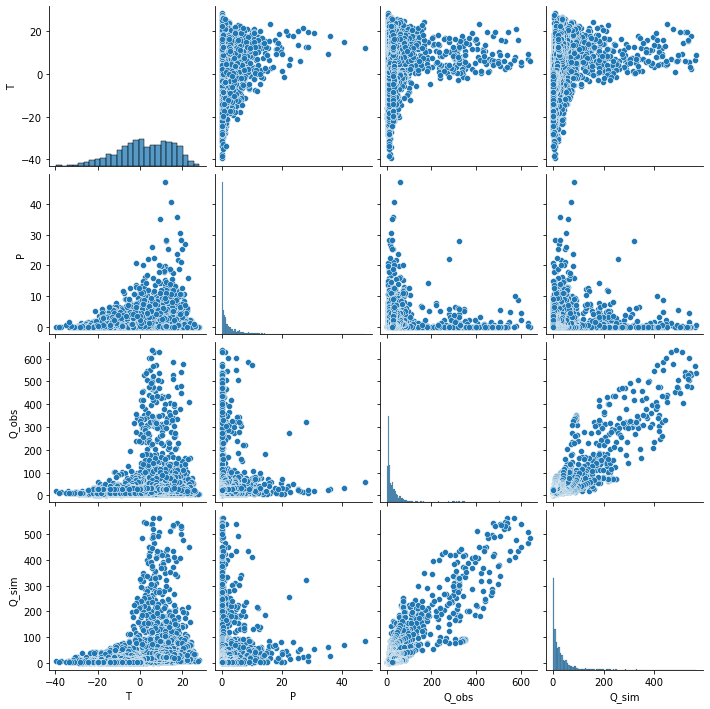

In [29]:
sns.pairplot(df[['T',
                 'P',
                 'Q_obs',
                 'Q_sim',
                 #'target'
                   ]]
                    #, hue = 'target'
            )



На данном графике можно видеть, что смоделированные и фактические расходы имеют явную зависимость. Поэтому интересно посмотреть на сколько скоррелированы признаки. Для рассмотрения какой-то конкретной пары нам будет нужен **joint plot** - некий симбиоз между dist и pair plot

C:\Users\gorba\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


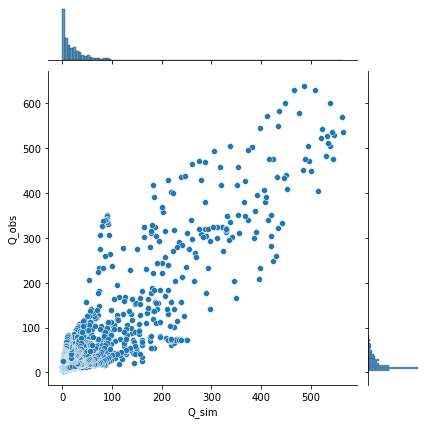

In [30]:
sns.jointplot(df['Q_sim'], df['Q_obs'])

И напоследок о совместном распределении признаков))

seaborn дает возможность очень красиво проиллюстрировать корреляционную матрицу

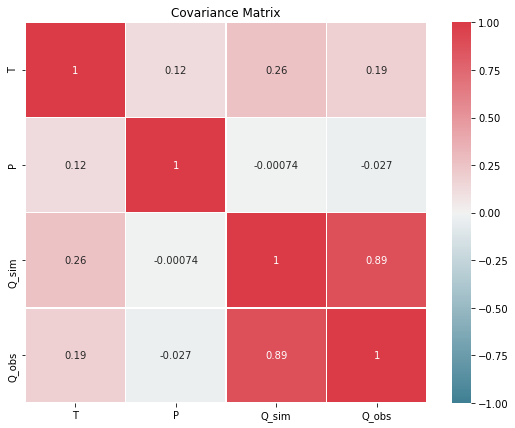

In [31]:
# характеристики графика и раскраски
f, ax = plt.subplots(figsize=(9, 7))
cmap = sns.diverging_palette(220, 10, as_cmap = True)


corr = df[['T','P', 'Q_sim', 'Q_obs']].corr()
sns.heatmap(corr, cmap = cmap, center  = 0, ax = ax, vmax = 1.0, vmin = -1.0, linewidths = 0.5, annot = True)
plt.title('Covariance Matrix')
plt.show()

## ЧУТЬ-ЧУТЬ УСЛОЖНЯЕМ ЗАДАЧУ

В этой части семинара будем работать с несколько иными данными. 
И сразу в качестве индекса зададим дату наблюдения с помощью функции **set_index**

In [32]:
df2 = pd.read_csv('kosa_Inva.csv', sep=";")
df2.date = pd.to_datetime(df2.date, format="%d.%m.%Y")
df2 = df2.set_index('date')
df2.head()


,GP,year,month,day,T,P,Q_obs,Q_sim
date,,,,,,,,
2008-01-01,76075 Kosa,2008,1,1,-6.5,0.6,10.6,0.0
2008-01-02,76075 Kosa,2008,1,2,-16.1,0.0,10.6,0.0
2008-01-03,76075 Kosa,2008,1,3,-13.8,0.9,10.6,0.0
2008-01-04,76075 Kosa,2008,1,4,-13.2,0.7,10.6,0.0
2008-01-05,76075 Kosa,2008,1,5,-11.7,0.4,10.2,0.0


In [33]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5844 entries, 2008-01-01 to 2015-12-31
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   GP      5844 non-null   object 
 1   year    5844 non-null   int64  
 2   month   5844 non-null   int64  
 3   day     5844 non-null   int64  
 4   T       5844 non-null   float64
 5   P       5844 non-null   float64
 6   Q_obs   5844 non-null   float64
 7   Q_sim   5844 non-null   float64
dtypes: float64(4), int64(3), object(1)
memory usage: 410.9+ KB


**Появился еще один столбец с гидропостами. Давайте посмотрим, сколько там различных гидропостов**

In [34]:
df2['GP'].value_counts()

76141 Sludka    2922
76075 Kosa      2922
Name: GP, dtype: int64

## 1. Простейшие графики

Построим график расходов для каждого из поста. 
В общем случае надо сначала отфильтровать данные, выбрать необходимые столбцы, посчитать необходимые величины и построить график с помощью функции plot()

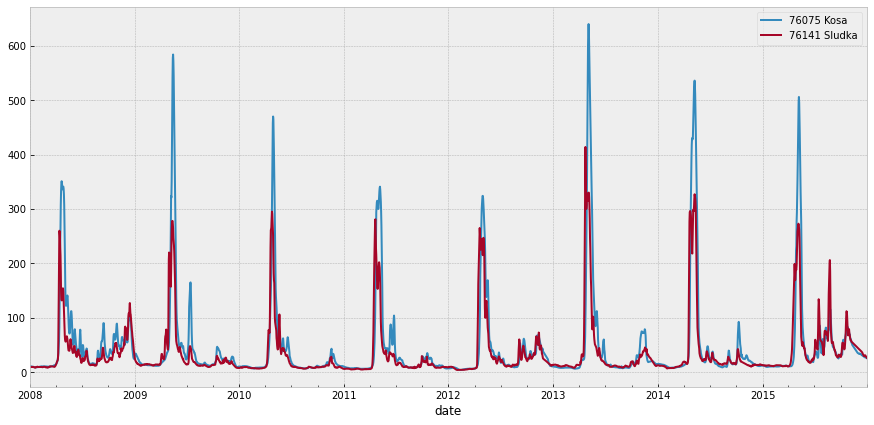

In [35]:

with plt.style.context('bmh'):
    fig = plt.figure(figsize=(15,7)) # отвечает за размер 
    df2[['GP', 'Q_obs']].groupby('GP')['Q_obs'].plot()
    plt.legend()

Какие выводы можно сделать по данному графику?

### !!! Задание 5. 
1. С помощью параметра hue функций pairplot постройте совместное распределение признаков для двух гидропостов.
2. С помощью параметра hue функций boxplot постройте распределения температур по месяцам за 2011 год для двух гидропостов (либо за весь период).

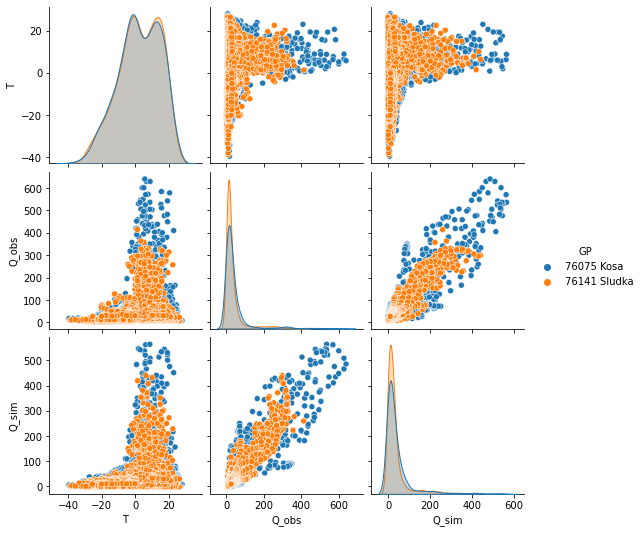

In [37]:
sns.pairplot(df2[['T',

                 'Q_obs',
                 'Q_sim',
                 'GP'
                   ]]
                    , hue = 'GP'
            )

### Задание 6.

Напишите функции, считающие среднеквадратичное отклонение и коэффициент Нэша-Сатклиффа. 
Чему они равны для смоделированных и наблюдаемых расходов для каждого из гидропостов.

In [42]:
pip install hydroeval

Note: you may need to restart the kernel to use updated packages.


In [52]:
def RMSE(q_obs, q_sim):
    n = len(q_obs)
    s = 0
    for i in range (n):
        st=(q_obs[i]-q_sim[i])**2
    s = (st/n)**(0.5)
    return s
print(RMSE(df2['Q_obs'], df2['Q_sim']))

0.221682191466801


In [49]:
from sklearn.metrics import mean_squared_error
import hydroeval as he
from sklearn.metrics import r2_score

def RMSE(q_obs, q_sim):
    rms = mean_squared_error(q_obs, q_sim, squared=False)
    return rms

def NS(q_obs, q_sim):
    nse = he.evaluator(he.nse, q_sim, q_obs)
    return nse

print(RMSE(df2['Q_obs'], df2['Q_sim']))
print(NS(df2['Q_obs'], df2['Q_sim']))
print(r2_score(df2['Q_obs'], df2['Q_sim']))

31.128580260556184
[0.81347507]
0.8134750671302768


In [38]:
from sklearn.metrics import mean_squared_error
import hydroeval as he


def RMSE(q_obs, q_sim):
    rms = mean_squared_error(q_obs, q_sim, squared=False)
    return rms

def NS(q_obs, q_sim):
    nse = he.evaluator(he.nse, q_sim, q_obs)
    # ваш код здесь
    return 

q_obs_kos = #  Ваш код здесь
q_sim_kos = # Ваш код здесь

print('Коса:')
print('NS:', NS(q_obs_kos, q_sim_kos))
print('RMSE:', RMSE(q_obs_kos, q_sim_kos))



q_obs_sl = #  Ваш код здесь
q_sim_sl = # Ваш код здесь

print('Слудка:')
print('NS:', NS(q_obs_sl, q_sim_sl))
print('RMSE:', RMSE(q_obs_sl, q_sim_sl))

SyntaxError: invalid syntax (<ipython-input-38-aff0b0a41092>, line 12)